In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
daily_activity=pd.read_csv(r'D:\Data Analysis Project\2) FitBit Fitness Tracker Data\data\raw\mturkfitbit_export_3.12.16-4.11.16\dailyActivity_merged.csv')

In [4]:
daily_activity.shape

(940, 15)

In [5]:
daily_activity_original=daily_activity.copy()

In [6]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [7]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [8]:
sleep_day_merged=pd.read_csv(r'D:\Data Analysis Project\2) FitBit Fitness Tracker Data\data\raw\mturkfitbit_export_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\sleepDay_merged.csv')
sleep_day_merged_original=sleep_day_merged.copy()
sleep_day_merged.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [9]:
heartrate_seconds_merged=pd.read_csv(r'D:\Data Analysis Project\2) FitBit Fitness Tracker Data\data\raw\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\heartrate_seconds_merged.csv')
heartrate_seconds_merged_original=heartrate_seconds_merged.copy()
heartrate_seconds_merged.head()

,Id,Time,Value
0,2022484408,4/1/2016 7:54:00 AM,93
1,2022484408,4/1/2016 7:54:05 AM,91
2,2022484408,4/1/2016 7:54:10 AM,96
3,2022484408,4/1/2016 7:54:15 AM,98
4,2022484408,4/1/2016 7:54:20 AM,100


## Let we clean data first

In [10]:
# Filter to show all instances of rows that are duplicated
all_duplicate_rows = daily_activity[daily_activity.duplicated(subset=['Id', 'ActivityDate'], keep=False)]

print("All duplicate rows:")
print(all_duplicate_rows)


All duplicate rows:
Empty DataFrame
Columns: [Id, ActivityDate, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories]
Index: []


| Check Type                           | Interpretation                            | Good/Bad                    |
| ------------------------------------ | ----------------------------------------- | --------------------------- |
| `duplicated(['Id', 'ActivityDate'])` | Duplicate entries for same user same day? | ❌ No duplicates → ✔ PERFECT |
| `duplicated(['Id'])`                 | User appears more than once?              | ✔ Yes → NORMAL              |


Checking only Id will always show many duplicates because:
Users have many daily records
This is how Fitbit data is structured

In [11]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [12]:
# convert ActivityDate datatype from object to date
daily_activity['ActivityDate']=pd.to_datetime(daily_activity['ActivityDate'])

In [13]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [14]:
daily_activity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

### Now let we check for ouliers

In [15]:
daily_activity[daily_activity['TotalSteps']>40000] # if total steps are greater than 40000 then mark it as outlier

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories


In [16]:
daily_activity[daily_activity['TotalSteps']==0] # rest day 

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
30,1503960366,2016-05-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
104,1844505072,2016-04-24,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1347
105,1844505072,2016-04-25,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1347
106,1844505072,2016-04-26,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1347
112,1844505072,2016-05-02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,8792009665,2016-05-06,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688
905,8792009665,2016-05-07,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688
906,8792009665,2016-05-08,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688
907,8792009665,2016-05-09,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688


In [17]:
daily_activity[(daily_activity['Calories']==0) & (daily_activity['TotalSteps']>0)]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories


In [18]:
daily_activity[daily_activity['Calories']>6000]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories


In [19]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [20]:
daily_activity[(daily_activity['VeryActiveMinutes'] + daily_activity['FairlyActiveMinutes'] + daily_activity['LightlyActiveMinutes'] + daily_activity['SedentaryMinutes'])>1440]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories


##### “Distance values were verified using the steps-to-distance conversion method. The observed values align with typical running stride lengths (≈1600 steps per mile), confirming that Fitbit distance units in this dataset are measured in miles.”

In [21]:
daily_activity[(daily_activity['TotalDistance']>19) & (daily_activity['TotalSteps']<2000)]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories


In [22]:
daily_activity[daily_activity['TotalDistance']>25]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
50,1624580081,2016-05-01,36019,28.030001,28.030001,0.0,21.92,4.19,1.91,0.02,186,63,171,1020,2690
913,8877689391,2016-04-16,29326,25.290001,25.290001,0.0,13.24,1.21,10.71,0.00,94,29,429,888,4547
927,8877689391,2016-04-30,27745,26.719999,26.719999,0.0,21.66,0.08,4.93,0.00,124,4,223,1089,4398


#### Use BOTH steps and distance
- Do NOT remove high steps + high distance
- Remove low steps + high distance

##### now we have to remove entries where sendentaryminutes are greater then 1300 and total steps are greater then 200.

In [23]:
daily_activity[(daily_activity['SedentaryMinutes']>1300) & (daily_activity['TotalSteps']>200)]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
34,1624580081,2016-04-15,1510,0.98,0.98,0.0,0.00,0.00,0.97,0.00,0,0,96,1344,1344
47,1624580081,2016-04-28,2759,1.79,1.79,0.0,0.00,0.20,1.60,0.00,0,5,115,1320,1401
52,1624580081,2016-05-03,2100,1.37,1.37,0.0,0.00,0.00,1.34,0.02,0,0,96,1344,1334
53,1624580081,2016-05-04,2193,1.43,1.43,0.0,0.00,0.00,1.42,0.00,0,0,118,1322,1368
54,1624580081,2016-05-05,2470,1.61,1.61,0.0,0.00,0.00,1.58,0.02,0,0,117,1323,1370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,8583815059,2016-05-05,12427,9.69,9.69,0.0,0.00,0.00,1.18,0.00,0,0,70,1370,3266
884,8792009665,2016-04-16,244,0.16,0.16,0.0,0.00,0.00,0.16,0.00,0,0,12,1428,1721
892,8792009665,2016-04-24,400,0.26,0.26,0.0,0.04,0.05,0.16,0.00,3,8,19,1410,1799
894,8792009665,2016-04-26,1321,0.85,0.85,0.0,0.00,0.00,0.85,0.00,0,0,80,1360,1928


#### now remove the entries where sedentaryminutes aer greater then 1300 and calories are greater then 2000

In [24]:
daily_activity = daily_activity[~((daily_activity['SedentaryMinutes'] > 1300) & (daily_activity['Calories'] > 2000))]

In [25]:
daily_activity.shape

(879, 15)

#### now remove entries where sedentaryminutes are greater than 1300 and total steps are freater then 0

In [26]:
daily_activity[(daily_activity['SedentaryMinutes'] > 1300) & (daily_activity['TotalSteps'] > 0)]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
34,1624580081,2016-04-15,1510,0.98,0.98,0.0,0.00,0.00,0.97,0.00,0,0,96,1344,1344
47,1624580081,2016-04-28,2759,1.79,1.79,0.0,0.00,0.20,1.60,0.00,0,5,115,1320,1401
52,1624580081,2016-05-03,2100,1.37,1.37,0.0,0.00,0.00,1.34,0.02,0,0,96,1344,1334
53,1624580081,2016-05-04,2193,1.43,1.43,0.0,0.00,0.00,1.42,0.00,0,0,118,1322,1368
54,1624580081,2016-05-05,2470,1.61,1.61,0.0,0.00,0.00,1.58,0.02,0,0,117,1323,1370
55,1624580081,2016-05-06,1727,1.12,1.12,0.0,0.00,0.00,1.12,0.01,0,0,102,1338,1341
58,1624580081,2016-05-09,1732,1.13,1.13,0.0,0.00,0.00,1.13,0.00,0,0,91,1349,1328
59,1624580081,2016-05-10,2969,1.93,1.93,0.0,0.00,0.00,1.92,0.01,0,0,139,1301,1393
60,1624580081,2016-05-11,3134,2.04,2.04,0.0,0.00,0.00,2.04,0.00,0,0,112,1328,1359
99,1844505072,2016-04-19,197,0.13,0.13,0.0,0.00,0.00,0.13,0.00,0,0,10,1430,1366


In [27]:
daily_activity=daily_activity[~((daily_activity['SedentaryMinutes'] > 1300) & (daily_activity['TotalSteps'] > 0))]

In [28]:
daily_activity.shape

(835, 15)

##### check in calories 

In [29]:
daily_activity[daily_activity['Calories']==0]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
30,1503960366,2016-05-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
653,6290855005,2016-05-10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
817,8253242879,2016-04-30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
879,8583815059,2016-05-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0


In [30]:
daily_activity[daily_activity['Calories']>6000]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories


In [31]:
daily_activity[(daily_activity['Calories']>4500) & (daily_activity['TotalSteps']<5000)]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories


In [32]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


#### dropped four columns which are not useful

In [33]:
daily_activity.drop(columns=['LoggedActivitiesDistance', 'TrackerDistance', 'ModeratelyActiveDistance'], inplace=True)

In [34]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 939
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Id                       835 non-null    int64         
 1   ActivityDate             835 non-null    datetime64[ns]
 2   TotalSteps               835 non-null    int64         
 3   TotalDistance            835 non-null    float64       
 4   VeryActiveDistance       835 non-null    float64       
 5   LightActiveDistance      835 non-null    float64       
 6   SedentaryActiveDistance  835 non-null    float64       
 7   VeryActiveMinutes        835 non-null    int64         
 8   FairlyActiveMinutes      835 non-null    int64         
 9   LightlyActiveMinutes     835 non-null    int64         
 10  SedentaryMinutes         835 non-null    int64         
 11  Calories                 835 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(7

In [35]:
daily_activity.shape

(835, 12)

## sleep day merged analysis

In [36]:
sleep_day_merged.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [37]:
sleep_day_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [38]:
# check duplicates
sleep_day_merged.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
408    False
409    False
410    False
411    False
412    False
Length: 413, dtype: bool

In [39]:
all_duplicate_entries=sleep_day_merged[sleep_day_merged.duplicated(subset=['Id', 'SleepDay'], keep=False)]
all_duplicate_entries

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
160,4388161847,5/5/2016 12:00:00 AM,1,471,495
161,4388161847,5/5/2016 12:00:00 AM,1,471,495
222,4702921684,5/7/2016 12:00:00 AM,1,520,543
223,4702921684,5/7/2016 12:00:00 AM,1,520,543
379,8378563200,4/25/2016 12:00:00 AM,1,388,402
380,8378563200,4/25/2016 12:00:00 AM,1,388,402


In [40]:
sleep_day_merged=sleep_day_merged.drop_duplicates(subset=['Id', 'SleepDay'], keep='first')

In [41]:
sleep_day_merged.shape
# 3 duplicate removed 

(410, 5)

In [42]:
# convert data type of sleep day
sleep_day_merged['SleepDay']=pd.to_datetime(sleep_day_merged['SleepDay'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20232\2586477466.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep_day_merged['SleepDay']=pd.to_datetime(sleep_day_merged['SleepDay'])


In [43]:
sleep_day_merged['SleepDay']=sleep_day_merged['SleepDay'].dt.date

In [44]:
sleep_day_merged.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [45]:
sleep_day_merged.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [46]:
sleep_day_merged[sleep_day_merged['TotalMinutesAsleep']>sleep_day_merged['TotalTimeInBed']]

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed


In [47]:
sleep_day_merged[sleep_day_merged['TotalMinutesAsleep'] > 800]

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed


In [48]:
sleep_day_merged[sleep_day_merged['TotalTimeInBed'] > 900]
sleep_day_merged=sleep_day_merged[~(sleep_day_merged['TotalTimeInBed'] > 900)]
sleep_day_merged.shape

(406, 5)

#### “Records with TotalTimeInBed greater than 900 minutes (15 hours) were removed as physiologically unrealistic and likely due to device logging errors.”

In [49]:
sleep_day_merged.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [50]:
sleep_day_merged=sleep_day_merged.rename(columns={'SleepDay' : 'SleepDate'})

In [51]:
# convert data type of sleep date
sleep_day_merged['SleepDate']=pd.to_datetime(sleep_day_merged['SleepDate'])

In [52]:
sleep_day_merged.shape

(406, 5)

merged_df = activity + sleep


In [53]:
merged_df = pd.merge(daily_activity, sleep_day_merged, left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDate'], how='left')

In [54]:
merged_df.shape

(835, 16)

In [55]:
merged_df.drop(columns=['SleepDate'], inplace=True)

In [56]:
merged_df.isnull().sum()

Id                           0
ActivityDate                 0
TotalSteps                   0
TotalDistance                0
VeryActiveDistance           0
LightActiveDistance          0
SedentaryActiveDistance      0
VeryActiveMinutes            0
FairlyActiveMinutes          0
LightlyActiveMinutes         0
SedentaryMinutes             0
Calories                     0
TotalSleepRecords          429
TotalMinutesAsleep         429
TotalTimeInBed             429
dtype: int64

💡 Why sleep data has fewer rows than activity data? / why there are so much nan values in last three columns

Because:

People wear Fitbit during the day (activity)

But not always at night (sleep)

Or sleep might not be auto-detected

So NaN simply means:

📌 “User did not record sleep on this day.”

### Heartrate Seconds Data Analysis

In [57]:
heartrate_seconds_merged.head()

,Id,Time,Value
0,2022484408,4/1/2016 7:54:00 AM,93
1,2022484408,4/1/2016 7:54:05 AM,91
2,2022484408,4/1/2016 7:54:10 AM,96
3,2022484408,4/1/2016 7:54:15 AM,98
4,2022484408,4/1/2016 7:54:20 AM,100


In [58]:
heartrate_seconds_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154681 entries, 0 to 1154680
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Id      1154681 non-null  int64 
 1   Time    1154681 non-null  object
 2   Value   1154681 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.4+ MB


In [59]:
heartrate_seconds_merged['Time']=pd.to_datetime(heartrate_seconds_merged['Time'])

In [60]:
heartrate_seconds_merged['Time']=heartrate_seconds_merged['Time'].dt.date

In [61]:
heartrate_seconds_merged.head()

,Id,Time,Value
0,2022484408,2016-04-01,93
1,2022484408,2016-04-01,91
2,2022484408,2016-04-01,96
3,2022484408,2016-04-01,98
4,2022484408,2016-04-01,100


In [62]:
heartrate_seconds_merged['Time']=pd.to_datetime(heartrate_seconds_merged['Time'])

In [63]:
heartrate_seconds_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154681 entries, 0 to 1154680
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Id      1154681 non-null  int64         
 1   Time    1154681 non-null  datetime64[ns]
 2   Value   1154681 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 26.4 MB


In [64]:
sleep_day_merged=sleep_day_merged.rename(columns={'Time' : 'Date'})

In [65]:
heartrate_seconds_merged.head()

,Id,Time,Value
0,2022484408,2016-04-01,93
1,2022484408,2016-04-01,91
2,2022484408,2016-04-01,96
3,2022484408,2016-04-01,98
4,2022484408,2016-04-01,100


### remove records where heart rate value is less then 30 and greater then 220 (impossible values)

In [66]:
heartrate_seconds_merged[heartrate_seconds_merged['Value']<30]

,Id,Time,Value


In [67]:
heartrate_seconds_merged[heartrate_seconds_merged['Value']>220]

,Id,Time,Value


In [68]:
heartrate_seconds_merged.head()

,Id,Time,Value
0,2022484408,2016-04-01,93
1,2022484408,2016-04-01,91
2,2022484408,2016-04-01,96
3,2022484408,2016-04-01,98
4,2022484408,2016-04-01,100


In [69]:
heartrate_seconds_merged=heartrate_seconds_merged.rename(columns={'Time' : 'Date'})

In [70]:
heartrate_seconds_merged.head()

,Id,Date,Value
0,2022484408,2016-04-01,93
1,2022484408,2016-04-01,91
2,2022484408,2016-04-01,96
3,2022484408,2016-04-01,98
4,2022484408,2016-04-01,100


In [71]:
daily_heart_rate=heartrate_seconds_merged.groupby(['Id', 'Date'])['Value'].agg(min_heart_rate='min', max_heart_rate='max', avg_heart_rate='mean').reset_index()
# The reset_index() method in the Python pandas library is used to reset a DataFrame or Series index to the default integer index (0, 1, 2, ...). 
# It is particularly useful after operations like filtering, sorting, or grouping, which can result in non-sequential or custom indices

In [72]:
daily_heart_rate
# only 143 users recored their heart rate 

,Id,Date,min_heart_rate,max_heart_rate,avg_heart_rate
0,2022484408,2016-04-01,53,182,88.563916
1,2022484408,2016-04-02,49,103,72.068685
2,2022484408,2016-04-03,49,126,74.398232
3,2022484408,2016-04-04,54,150,78.295372
4,2022484408,2016-04-05,53,143,83.474328
...,...,...,...,...,...
138,8877689391,2016-04-08,52,175,91.703780
139,8877689391,2016-04-09,49,175,93.716643
140,8877689391,2016-04-10,53,176,109.823317
141,8877689391,2016-04-11,47,148,67.863456


In [73]:
daily_heart_rate['heart_rate_range']=daily_heart_rate['max_heart_rate']-daily_heart_rate['min_heart_rate']

#### ✔ Why?

A large range means:
Intense workout, 
High variation, 
More calories burned

A small range means:
Sedentary day, 
Low activity

In [74]:
daily_heart_rate.head()

,Id,Date,min_heart_rate,max_heart_rate,avg_heart_rate,heart_rate_range
0,2022484408,2016-04-01,53,182,88.563916,129
1,2022484408,2016-04-02,49,103,72.068685,54
2,2022484408,2016-04-03,49,126,74.398232,77
3,2022484408,2016-04-04,54,150,78.295372,96
4,2022484408,2016-04-05,53,143,83.474328,90


In [75]:
merged_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,1.88,6.06,0.0,25,13,328,728,1985,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,1.57,4.71,0.0,21,19,217,776,1797,2.0,384.0,407.0
2,1503960366,2016-04-14,10460,6.74,2.44,3.91,0.0,30,11,181,1218,1776,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,2.14,2.83,0.0,29,34,209,726,1745,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.16,2.71,5.04,0.0,36,10,221,773,1863,2.0,340.0,367.0


In [76]:
merged_df=pd.merge(merged_df, daily_heart_rate, left_on=['Id', 'ActivityDate'], right_on=['Id', "Date"], how='left')

In [77]:
merged_df.drop(columns=['Date'], inplace=True)

In [78]:
merged_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,min_heart_rate,max_heart_rate,avg_heart_rate,heart_rate_range
0,1503960366,2016-04-12,13162,8.50,1.88,6.06,0.0,25,13,328,728,1985,1.0,327.0,346.0,NaN,NaN,NaN,NaN
1,1503960366,2016-04-13,10735,6.97,1.57,4.71,0.0,21,19,217,776,1797,2.0,384.0,407.0,NaN,NaN,NaN,NaN
2,1503960366,2016-04-14,10460,6.74,2.44,3.91,0.0,30,11,181,1218,1776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,2.14,2.83,0.0,29,34,209,726,1745,1.0,412.0,442.0,NaN,NaN,NaN,NaN
4,1503960366,2016-04-16,12669,8.16,2.71,5.04,0.0,36,10,221,773,1863,2.0,340.0,367.0,NaN,NaN,NaN,NaN


In [79]:
merged_df['min_heart_rate'].isnull().sum()

np.int64(827)

In [80]:
heartrate_seconds_merged['Id'].unique()

array([2022484408, 2026352035, 2347167796, 4020332650, 4558609924,
       5553957443, 5577150313, 6117666160, 6391747486, 6775888955,
       6962181067, 7007744171, 8792009665, 8877689391])

In [81]:
daily_activity.to_csv('daily_activity.csv', index=False)

In [82]:
sleep_day_merged.to_csv('sleep_day_merged.csv', index=False)

In [83]:
merged_df.to_csv('cleaned_master_dataset.csv', index=False)

### Feature Engineering

In [ ]:
merged_df['SleepEfficiency'] = (merged_df['TotalMinutesAsleep'] / merged_df['TotalTimeInBed'])

array([0.94508671, 0.94348894,        nan, 0.9321267 , 0.92643052,
       0.98314607, 0.95      , 0.95490716, 0.89285714, 0.94010417,
       0.95768374, 0.85758514, 0.89416058, 0.93129771, 0.96327684,
       0.95058824, 0.93181818, 0.89644013, 0.9222973 , 0.93560606,
       0.91008174, 0.94842407, 0.97217676, 0.98830409, 0.95037221,
       0.93137255, 0.93700787, 0.87323944, 0.88961039, 0.96774194,
       0.94312796, 0.95190381, 0.93968254, 0.93258427, 0.92124542,
       0.93982301, 0.95950704, 0.91273997, 0.92416226, 0.87751004,
       0.92222222, 0.90392157, 0.92801556, 0.95412844, 0.94223827,
       0.93908629, 0.95291902, 0.93211009, 0.9412844 , 0.96078431,
       0.94398682, 0.96520147, 0.94106814, 0.96071429, 0.96494845,
       0.95620438, 0.98080614, 0.95246479, 0.95503597, 0.93947368,
       0.94575045, 0.94020619, 0.88405797, 0.87947269, 0.91002045,
       0.8968254 , 0.92358804, 0.89766607, 0.90466926, 0.95041322,
       0.87852495, 0.96891192, 0.96296296, 0.91932059, 0.88979

In [85]:
merged_df['SleepEfficiency']=merged_df['SleepEfficiency']*100

In [86]:
merged_df['SleepEfficiency'] = merged_df['SleepEfficiency'].round(2)

In [87]:
merged_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,min_heart_rate,max_heart_rate,avg_heart_rate,heart_rate_range,SleepEfficiency
0,1503960366,2016-04-12,13162,8.50,1.88,6.06,0.0,25,13,328,728,1985,1.0,327.0,346.0,NaN,NaN,NaN,NaN,94.51
1,1503960366,2016-04-13,10735,6.97,1.57,4.71,0.0,21,19,217,776,1797,2.0,384.0,407.0,NaN,NaN,NaN,NaN,94.35
2,1503960366,2016-04-14,10460,6.74,2.44,3.91,0.0,30,11,181,1218,1776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,2.14,2.83,0.0,29,34,209,726,1745,1.0,412.0,442.0,NaN,NaN,NaN,NaN,93.21
4,1503960366,2016-04-16,12669,8.16,2.71,5.04,0.0,36,10,221,773,1863,2.0,340.0,367.0,NaN,NaN,NaN,NaN,92.64


#### High efficiency → Good sleep,
#### Low efficiency → Disturbed sleep (lots of awakenings)

In [88]:
conditions = [
    (merged_df['TotalSteps'] < 5000),
    (merged_df['TotalSteps'] >= 5000) & (merged_df['TotalSteps'] < 7500),
    (merged_df['TotalSteps'] >= 7500) & (merged_df['TotalSteps'] < 10000),
    (merged_df['TotalSteps'] >= 10000)
]

categories = [
    'Sedentary',
    'Low Active',
    'Moderately Active',
    'Highly Active'
]

merged_df['ActivityLevel'] = np.select(conditions, categories, default='Unknown')

In [89]:
merged_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,...,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,min_heart_rate,max_heart_rate,avg_heart_rate,heart_rate_range,SleepEfficiency,ActivityLevel
0,1503960366,2016-04-12,13162,8.50,1.88,6.06,0.0,25,13,328,...,1985,1.0,327.0,346.0,NaN,NaN,NaN,NaN,94.51,Highly Active
1,1503960366,2016-04-13,10735,6.97,1.57,4.71,0.0,21,19,217,...,1797,2.0,384.0,407.0,NaN,NaN,NaN,NaN,94.35,Highly Active
2,1503960366,2016-04-14,10460,6.74,2.44,3.91,0.0,30,11,181,...,1776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Highly Active
3,1503960366,2016-04-15,9762,6.28,2.14,2.83,0.0,29,34,209,...,1745,1.0,412.0,442.0,NaN,NaN,NaN,NaN,93.21,Moderately Active
4,1503960366,2016-04-16,12669,8.16,2.71,5.04,0.0,36,10,221,...,1863,2.0,340.0,367.0,NaN,NaN,NaN,NaN,92.64,Highly Active


In [90]:
merged_df['ActivityLevel'].unique()

array(['Highly Active', 'Moderately Active', 'Sedentary', 'Low Active'],
      dtype=object)

In [91]:
merged_df['TotalActiveMinutes']=(merged_df['VeryActiveMinutes'].fillna(0) 
                                   + merged_df['FairlyActiveMinutes'].fillna(0) 
                                   + merged_df['LightlyActiveMinutes'].fillna(0))

#### Why .fillna(0)?
If any activity-minute column has NaN for a row, filling with 0 avoids producing NaN in the sum and correctly treats “no recorded minutes” as zero activity for that category.

In [92]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Id                       835 non-null    int64         
 1   ActivityDate             835 non-null    datetime64[ns]
 2   TotalSteps               835 non-null    int64         
 3   TotalDistance            835 non-null    float64       
 4   VeryActiveDistance       835 non-null    float64       
 5   LightActiveDistance      835 non-null    float64       
 6   SedentaryActiveDistance  835 non-null    float64       
 7   VeryActiveMinutes        835 non-null    int64         
 8   FairlyActiveMinutes      835 non-null    int64         
 9   LightlyActiveMinutes     835 non-null    int64         
 10  SedentaryMinutes         835 non-null    int64         
 11  Calories                 835 non-null    int64         
 12  TotalSleepRecords        406 non-nul

In [93]:
# 1) ensure total minutes + sedentary <= 1440 where both exist
invalid_minutes = merged_df[
    (merged_df['TotalActiveMinutes'] + merged_df['SedentaryMinutes'] > 1440)
]
print("Rows with impossible minutes:", len(invalid_minutes))

Rows with impossible minutes: 0


In [94]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Id                       835 non-null    int64         
 1   ActivityDate             835 non-null    datetime64[ns]
 2   TotalSteps               835 non-null    int64         
 3   TotalDistance            835 non-null    float64       
 4   VeryActiveDistance       835 non-null    float64       
 5   LightActiveDistance      835 non-null    float64       
 6   SedentaryActiveDistance  835 non-null    float64       
 7   VeryActiveMinutes        835 non-null    int64         
 8   FairlyActiveMinutes      835 non-null    int64         
 9   LightlyActiveMinutes     835 non-null    int64         
 10  SedentaryMinutes         835 non-null    int64         
 11  Calories                 835 non-null    int64         
 12  TotalSleepRecords        406 non-nul

# EDA

## STEP 1: Steps vs Calories Analysis

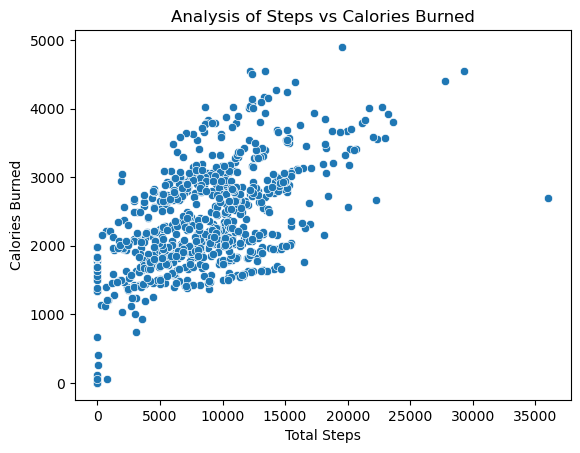

In [95]:
sns.scatterplot(x='TotalSteps', y='Calories', data=merged_df)
plt.title("Analysis of Steps vs Calories Burned")
plt.xlabel("Total Steps")
plt.ylabel("Calories Burned")
plt.show()


#### The scatter plot reveals a strong positive relationship between total daily steps and calories burned. As step count increases, calorie expenditure rises consistently, although variability increases at higher activity levels due to differences in intensity and individual metabolism.

In [96]:
merged_df['TotalSteps'].corr(merged_df['Calories'])

np.float64(0.5898168758513653)

#### The correlation between total daily steps and calories burned is moderately positive (r = 0.58), indicating that while increased step count generally leads to higher calorie expenditure, other factors such as activity intensity and individual differences also play a significant role

## STEP 2: ActivityLevel vs Calories

In [97]:
average_calories_by_activity=merged_df.groupby('ActivityLevel')['Calories'].mean().reset_index()
average_calories_by_activity

,ActivityLevel,Calories
0,Highly Active,2739.570000
1,Low Active,2251.520958
2,Moderately Active,2463.562500
3,Sedentary,1735.673077


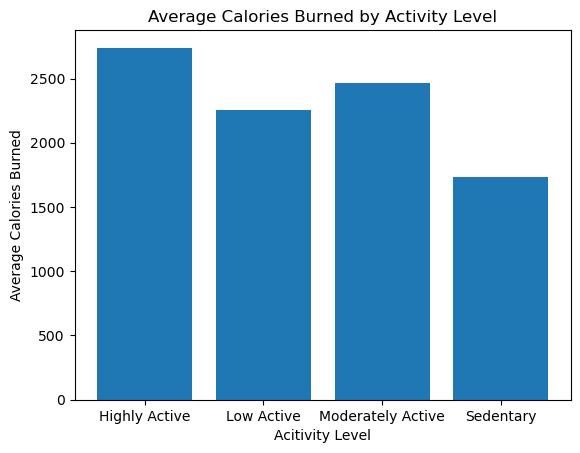

In [98]:
plt.bar(average_calories_by_activity['ActivityLevel'], average_calories_by_activity['Calories'])
plt.xlabel("Acitivity Level")
plt.ylabel('Average Calories Burned')
plt.title('Average Calories Burned by Activity Level')
plt.show()

#### Average daily calorie expenditure increases steadily with activity level. Highly active days burn approximately 1,000 more calories than sedentary days, highlighting the substantial impact of increased physical activity on energy expenditure

In [99]:
len(merged_df['SleepEfficiency'])

835

In [100]:
merged_df['SleepEfficiency'].isnull().sum()

np.int64(429)

## STEP 3: ActivityLevel vs SleepEffciency

In [101]:
sleep_activity_df = merged_df.dropna(subset=['SleepEfficiency']) 
# keep only rows where values are not null and store it in seprate dataframe for analysis 
# if stored in same dataset then entries contain nan will be removed 
sleep_activity_df['ActivityLevel'].unique()

array(['Highly Active', 'Moderately Active', 'Sedentary', 'Low Active'],
      dtype=object)

In [102]:
avg_sleep_eff_by_activity=(sleep_activity_df.groupby('ActivityLevel')['SleepEfficiency'].mean().reset_index())
avg_sleep_eff_by_activity

,ActivityLevel,SleepEfficiency
0,Highly Active,90.223818
1,Low Active,92.051250
2,Moderately Active,92.848831
3,Sedentary,93.748152


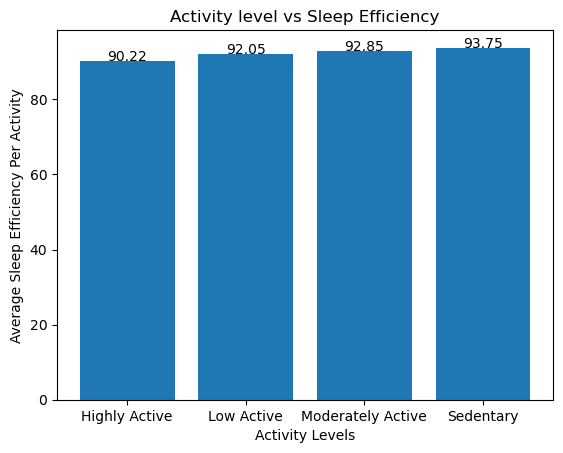

In [103]:
plt.bar(avg_sleep_eff_by_activity['ActivityLevel'], avg_sleep_eff_by_activity['SleepEfficiency'])
plt.title("Activity level vs Sleep Efficiency")
plt.xlabel("Activity Levels")
plt.ylabel('Average Sleep Efficiency Per Activity')

for i, score in enumerate(avg_sleep_eff_by_activity['SleepEfficiency']):
    plt.text(i, score+0.08, f'{score:.2f}', ha='center')
    
plt.show()

In [104]:
''' Higher activity improves sleep duration and health, but efficiency can drop slightly due to physical recovery needs. 
'''
avg_sleep_eff_by_activity.head()

,ActivityLevel,SleepEfficiency
0,Highly Active,90.223818
1,Low Active,92.051250
2,Moderately Active,92.848831
3,Sedentary,93.748152


### Sleep efficiency is highest on sedentary days and gradually decreases with increasing activity level. While physical activity is beneficial for overall health, highly active days may slightly reduce sleep efficiency due to increased physical fatigue and recovery demands.

## STEP 4: Sleep Duration vs Total Steps

In [105]:
# We must analyze only days where sleep was recorded.
sleep_steps_df = merged_df.dropna(subset=['TotalMinutesAsleep'])
''' 
Why?
If sleep wasn’t tracked → no valid comparison
This avoids misleading results
'''
sleep_steps_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,min_heart_rate,max_heart_rate,avg_heart_rate,heart_rate_range,SleepEfficiency,ActivityLevel,TotalActiveMinutes
0,1503960366,2016-04-12,13162,8.50,1.88,6.06,0.0,25,13,328,...,1.0,327.0,346.0,NaN,NaN,NaN,NaN,94.51,Highly Active,366
1,1503960366,2016-04-13,10735,6.97,1.57,4.71,0.0,21,19,217,...,2.0,384.0,407.0,NaN,NaN,NaN,NaN,94.35,Highly Active,257
3,1503960366,2016-04-15,9762,6.28,2.14,2.83,0.0,29,34,209,...,1.0,412.0,442.0,NaN,NaN,NaN,NaN,93.21,Moderately Active,272
4,1503960366,2016-04-16,12669,8.16,2.71,5.04,0.0,36,10,221,...,2.0,340.0,367.0,NaN,NaN,NaN,NaN,92.64,Highly Active,267
5,1503960366,2016-04-17,9705,6.48,3.19,2.51,0.0,38,20,164,...,1.0,700.0,712.0,NaN,NaN,NaN,NaN,98.31,Moderately Active,222


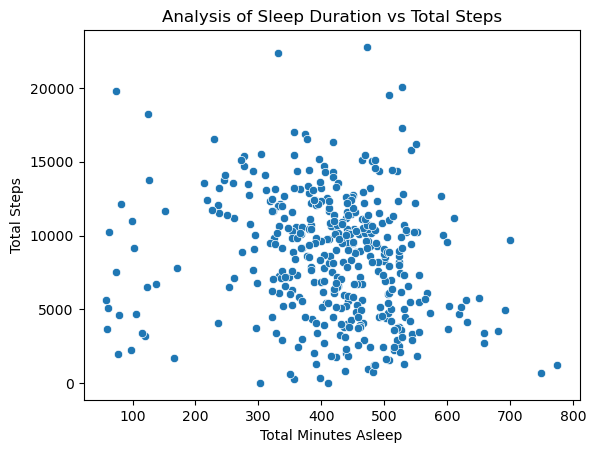

In [106]:
sns.scatterplot(x=sleep_steps_df['TotalMinutesAsleep'], y=sleep_steps_df['TotalSteps'])
plt.title("Analysis of Sleep Duration vs Total Steps")
plt.xlabel("Total Minutes Asleep")
plt.ylabel("Total Steps")
plt.show()

In [107]:
sleep_steps_df['TotalMinutesAsleep'].corr(sleep_steps_df['TotalSteps'])

np.float64(-0.1701279015450636)

#### “Sleep duration shows a weak negative correlation with total daily steps (r = −0.17), suggesting that longer sleep does not necessarily lead to increased physical activity and may reflect recovery or low-activity days.”

## STEP 5: Sleep Duration vs Sedentary Minutes

In [108]:
# Do people who sleep longer tend to be more sedentary during the day?
sleep_sedentary_df=merged_df.dropna(subset=['TotalMinutesAsleep'])
# sleep_sedentary_df.info()
sleep_sedentary_df.shape

(406, 22)

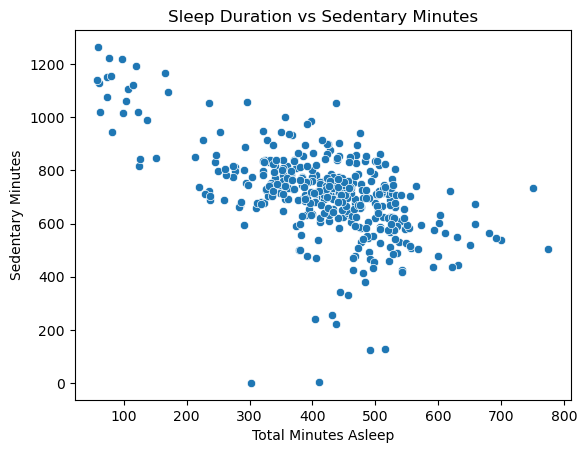

In [109]:
sns.scatterplot(x=sleep_sedentary_df['TotalMinutesAsleep'], y=sleep_sedentary_df['SedentaryMinutes'])
plt.title('Sleep Duration vs Sedentary Minutes') 
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Sedentary Minutes')
plt.show()

In [110]:
sleep_sedentary_df['SleepEfficiency'].corr(sleep_sedentary_df['SedentaryMinutes'])

np.float64(-0.009285797696463816)

#### The scatter plot indicates no significant linear relationship between sleep duration and sedentary minutes (r ≈ −0.0092). Although there is a slight downward tendency at higher sleep durations, overall sedentary behavior varies widely, suggesting that sleep length alone does not determine daily inactivity.

## STEP 6: Heart Rate Analysis

In [111]:
hr_df= merged_df.dropna(subset=['min_heart_rate'])
print(hr_df.shape)
hr_df.head()

(8, 22)


,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,min_heart_rate,max_heart_rate,avg_heart_rate,heart_rate_range,SleepEfficiency,ActivityLevel,TotalActiveMinutes
107,2022484408,2016-04-12,11875,8.34,3.31,4.26,0.0,42,14,227,...,NaN,NaN,NaN,52.0,134.0,82.541476,82.0,NaN,Highly Active,283
290,4020332650,2016-04-12,8539,6.12,0.15,5.68,0.0,4,15,331,...,1.0,501.0,541.0,49.0,81.0,62.023602,32.0,92.61,Moderately Active,350
411,4558609924,2016-04-12,5135,3.39,0.00,3.39,0.0,0,0,318,...,NaN,NaN,NaN,60.0,98.0,76.936782,38.0,NaN,Low Active,318
471,5553957443,2016-04-12,11596,7.57,1.37,5.41,0.0,19,13,277,...,1.0,441.0,464.0,51.0,104.0,63.051610,53.0,95.04,Highly Active,309
599,6962181067,2016-04-12,10199,6.74,3.40,2.51,0.0,50,14,189,...,1.0,366.0,387.0,59.0,176.0,88.039252,117.0,94.57,Highly Active,253


### HR Range vs VeryActiveMinutes,
#### Does higher activity intensity increase heart-rate variability?

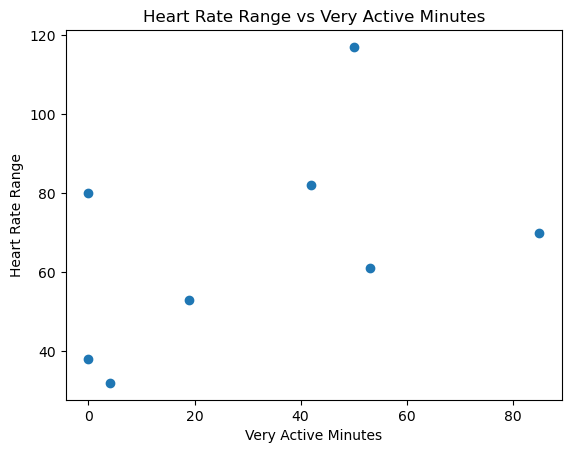

In [112]:
plt.scatter(hr_df['VeryActiveMinutes'], hr_df['heart_rate_range'])
plt.title('Heart Rate Range vs Very Active Minutes')
plt.xlabel('Very Active Minutes')
plt.ylabel('Heart Rate Range')
plt.show()


### Heart rate data is available for only 8 user-day records, which is insufficient for meaningful statistical analysis. Therefore, heart-rate-based insights are excluded from the core analysis.

## FINAL INSIGHTS — Student Fitness & Activity Analysis

---

### 📌 1. Steps and Calories Show a Moderate Positive Relationship

- A scatter plot of **TotalSteps vs Calories** shows a clear upward trend.
- The correlation value (**r = 0.58**) indicates a **moderate positive relationship**.
- This means walking more generally leads to higher calorie burn, but other factors such as activity intensity, metabolism, and individual differences also play a role.

**Insight:**
- Increased physical activity contributes significantly to calorie expenditure, but step count alone does not fully explain energy burn.

---

### 📌 2. Activity Level Strongly Impacts Calorie Expenditure

- Average calories burned by activity level:
  - **Sedentary:** ~1736 kcal  
  - **Low Active:** ~2252 kcal  
  - **Moderately Active:** ~2464 kcal  
  - **Highly Active:** ~2740 kcal  
- Highly active days burn approximately **1000 more calories** than sedentary days.

**Insight:**
- Even moderate increases in daily activity lead to substantial gains in calorie expenditure, highlighting the importance of regular movement.

---

### 📌 3. Sleep Efficiency Does Not Increase With Higher Activity

- Sedentary days showed the **highest sleep efficiency**.
- Highly active days showed **slightly lower sleep efficiency**.

**Insight:**
- Higher physical activity does not always translate to better sleep efficiency. Increased physical strain and recovery needs may slightly reduce sleep continuity on very active days.

---

### 📌 4. Sleep Duration Does Not Predict Higher Activity

- The correlation between **TotalMinutesAsleep and TotalSteps** was **weakly negative (r = −0.17)**.

**Insight:**
- Longer sleep duration does not necessarily result in increased physical activity and may reflect rest or recovery days.

---

### 📌 5. Sleep Duration and Sedentary Behavior Are Unrelated

- The correlation between **sleep duration and sedentary minutes** was effectively zero (**r ≈ −0.01**).

**Insight:**
- The amount of sleep alone does not meaningfully influence how sedentary a person is during the day.

---

### ⚠️ LIMITATIONS

- Sleep data was available only for days when users actively tracked sleep, leading to missing values on other days.
- Heart-rate data was present for only **8 user-day records**, which is insufficient for reliable statistical analysis.
- To avoid misleading conclusions, heart-rate-based insights were excluded from the core analysis.

---

### 🧠 KEY TAKEAWAYS

- Physical activity level is a stronger indicator of calorie burn than sleep duration.
- Sleep quality and activity have a complex relationship and should not be oversimplified.
- Real-world fitness data often contains missing values, and handling these responsibly improves analytical credibility.


### Conclusion
##### This project analyzed Fitbit fitness tracker data to explore the relationships between physical activity, sleep behavior, and calorie expenditure using real-world, imperfect data. The analysis showed that higher daily activity levels are strongly associated with increased calorie burn, while step count alone explains only part of overall energy expenditure. Sleep-related findings revealed that longer sleep duration does not necessarily lead to higher physical activity and that sleep efficiency does not consistently improve with increased activity, highlighting the complex interaction between rest and movement. Importantly, this project emphasized responsible data handling by acknowledging missing values and excluding insufficient heart-rate data to avoid misleading conclusions. Overall, the findings demonstrate that sustainable fitness outcomes are driven more by consistent activity patterns than by sleep duration alone, and they showcase the importance of thoughtful exploratory data analysis when working with real-world health datasets.